In [94]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

from IPython.display import clear_output

from env import host, username, password

def get_db_url(database, host=host, user=username, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'





## Detect Anomalies Using Density Based Clustering


### Clustering-Based Anomaly Detection



* Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids. Normal data points occur around a dense neighborhood and abnormalities are far away.
* Using density based clustering, like DBSCAN, we can design the model such that the data points that do not fall into a cluster are the anomalies.


### Steps




1. Select variables you want to cluster: df = df[["col1", "col2"]]

2. Convert to array & dtype float: np_array = df.values.astype("float32", copy = False)

3. Scale to standard normal:  \
scaler = StandardScaler().fit(np_array) np_array = scaler.transform(np_array)

4. Create DBSCAN object and fit: dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)

5. Extract labels: labels = dbsc.labels_

6. Add labels back to original dataframe:  \
df['labels'] = labels

7. Explore: \
df.labels.value_counts() sns.scatterplot(df.col1, df.col2, hue=df.labels)
>
>```py
># from __future__ import division
>
>import itertools
>
>import warnings
>
>warnings.filterwarnings("ignore")
>
>import matplotlib.pyplot as plt
>
>import matplotlib.dates as mdates
>
>import numpy as np
>
>import pandas as pd
>
>import math
>
>from sklearn import metrics
>
>from random import randint
>
>from matplotlib import style
>
>import seaborn as sns
>
>from sklearn.cluster import DBSCAN
>
>from sklearn.preprocessing import MinMaxScaler
>
>from env import host, user, password
>
>def get_db_url(database, host=host, user=user, password=password):
>
>    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
>
>url = get_db_url("grocery_db")
>
>sql = """
>
>select *
>
>from grocery_customers
>
>"""
>
>df = pd.read_sql(sql, url, index_col="customer_id")
>
>df.head()
>```

Normalize each attribute by scaling it to 0 mean and unit variance.

This helps to keep the inter-relationships between the features intact so that a small change in one feature would reflect in the other.
>
>```py
># Make the scaler
>
>scaler = MinMaxScaler()
>
># Fit the scaler
>
>scaler.fit(grocery_milk_fresh)
>
># Use the scaler
>
>grocery_milk_fresh = scaler.transform(grocery_milk_fresh)
>
>grocery_milk_fresh
>
>
>```

Construct a DBSCAN object that requires a minimum of 20 data points in a neighborhood of radius 0.1 to be considered a core point.
>
>```py
>
># Make the object
>
>dbsc = DBSCAN(eps = .10, min_samples = 20)
>
># Fit the object
>
>dbsc.fit(grocery_milk_fresh)
>
>DBSCAN(eps=0.1, min_samples=20)
>
># Now, let's add the scaled value columns back onto the dataframe
>
>columns = ["Grocery", "Milk", "Fresh"]
>
>scaled_columns = ["Scaled_" + column for column in columns]
>
># Save a copy of the original dataframe
>
>original_df = df.copy()
>
># Create a dataframe containing the scaled values
>
>scaled_df = pd.DataFrame(grocery_milk_fresh, columns=scaled_columns)
>
># Merge the scaled and non-scaled values into one dataframe
>
>df = df.merge(scaled_df, on=df.index)
>
>df = df.drop(columns=['key_0'])
>
>df.head()
>```
Next, we can extract our cluster labels and outliers to plot our results.
>
>```py
>
># Assign the cluster labels
>
># Recall that cluster labels don't have inherent meaning
>
># DBSCAN makes a cluster called -1 that contains the "noise" or outliers
>
>df['labels'] = dbsc.labels_
>
>df.labels.value_counts()
>
>
>
>
>
>Name: labels, dtype: int64
>
>df.head()
>
>sns.scatterplot(df.Grocery, df.Fresh, hue=df.labels)
>
>plt.show()
>
>sns.scatterplot(df.Milk, df.Fresh, hue=df.labels)
>
>plt.show()
>
>
>
>
>
>from mpl_toolkits.mplot3d import Axes3D
>
>fig = plt.figure(1, figsize=(8, 8))
>
>ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
>
># plot the points
>
>ax.scatter(df.Fresh, df.Milk, df.Grocery,
>
>           c=df.labels, edgecolor='k')
>
>ax.w_xaxis.set_ticklabels([])
>
>ax.w_yaxis.set_ticklabels([])
>
>ax.w_zaxis.set_ticklabels([])
>
>ax.set_xlabel('Fresh')
>
>ax.set_ylabel('Milk')
>
>ax.set_zlabel('Grocery')
>
>Text(0.5, 0, 'Grocery')
>
>```

### Experiment with the DBSCAN properties



* Read up on the epsilon and min_samples arguments into DBSCAN at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
* Experiment with altering the epsilon values (the eps argument holding the threshhold parameter). Run the models and visualize the results. What has changed? Why do you think that is?
* Double the min_samples parameter. Run your model and visualize the results. Consider what changed and why.


## Exercise

**file name:** clustering_anomaly_detection.py or clustering_anomaly_detection.ipynb


#### Clustering - DBSCAN



* Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.
* Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.
* Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

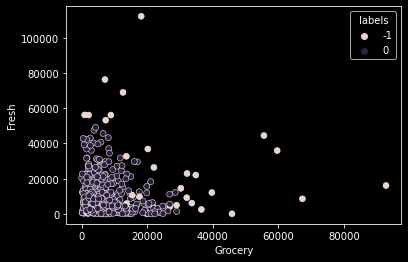

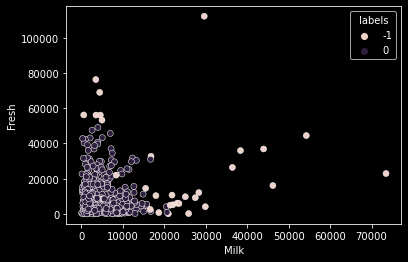

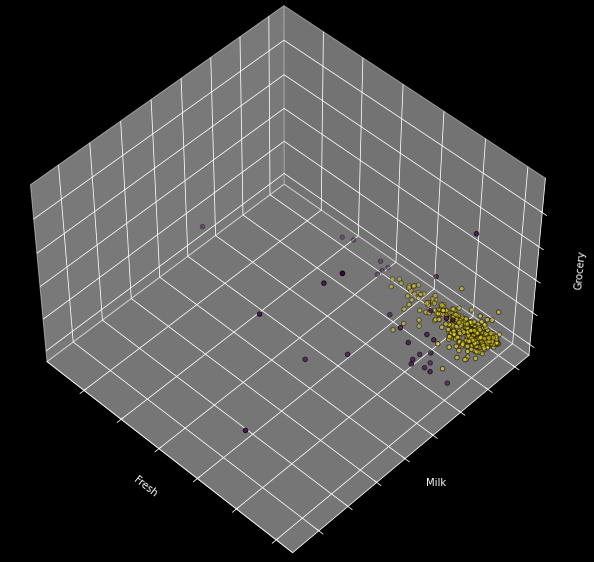

In [95]:
url = get_db_url("grocery_db")

sql = """
select *
from grocery_customers
"""

groc_df = pd.read_sql(sql, url, index_col="customer_id")
groc_df.head()




# Cluster on all or a selected subset of features
grocery_milk_fresh = groc_df[["Grocery", "Milk", "Fresh"]]
grocery_milk_fresh.head(2)

# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(grocery_milk_fresh)

# Use the scaler
grocery_milk_fresh = scaler.transform(grocery_milk_fresh)
grocery_milk_fresh

# Make the object
dbsc = DBSCAN(eps = .10, min_samples = 20)

# Fit the object
dbsc.fit(grocery_milk_fresh)

# Now, let's add the scaled value columns back onto the dataframe
columns = ["Grocery", "Milk", "Fresh"]
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_groc_df = groc_df.copy()

# Create a dataframe containing the scaled values
scaled_groc_df = pd.DataFrame(grocery_milk_fresh, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
groc_df = groc_df.merge(scaled_groc_df, on=groc_df.index)
groc_df = groc_df.drop(columns=['key_0'])
groc_df.head()

# Assign the cluster labels
# Recall that cluster labels don't have inherent meaning
# DBSCAN makes a cluster called -1 that contains the "noise" or outliers
groc_df['labels'] = dbsc.labels_
groc_df.labels.value_counts()

sns.scatterplot(groc_df.Grocery, groc_df.Fresh, hue=groc_df.labels)
plt.show()

sns.scatterplot(groc_df.Milk, groc_df.Fresh, hue=groc_df.labels)
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(groc_df.Fresh, groc_df.Milk, groc_df.Grocery,
           c=groc_df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery');


3


 [[ 8.61650429e-01 -2.97635672e+00]
 [-1.01284207e+00 -1.96036264e+00]
 [ 1.77304272e+00  3.87199615e-01]
 [ 1.89496881e+00 -2.97160305e+00]
 [ 2.95885319e+00 -2.64564281e+00]
 [-6.05072129e+00 -2.26236694e-01]
 [ 2.70042632e+00 -2.90974592e+00]
 [ 6.63183116e-01 -2.63579411e+00]
 [-1.40911559e-03  2.42805986e+00]
 [-4.80303712e+00  2.17931167e+00]
 [ 5.76751572e+00  1.07594735e-01]
 [ 1.71050492e+00  2.47582082e-01]
 [-1.08625327e+00 -1.90311396e+00]
 [ 3.77311367e+00 -2.96363142e+00]
 [ 1.70237626e+00  4.69200244e-01]
 [-2.17870842e+00  3.01021074e+00]
 [ 5.12735128e+00 -9.87621480e-01]
 [-3.54266532e+00  2.84169511e+00]
 [ 2.37109553e+00 -3.21562765e+00]
 [-1.72234012e+00 -1.97969801e-01]
 [-5.05408659e-01 -1.82288025e+00]
 [-3.82892158e+00  2.56659441e+00]
 [-5.53088844e+00  9.64284941e-01]
 [-5.42966169e+00  7.68265762e-01]
 [ 1.91727879e+00 -3.31783554e+00]
 [-5.07505808e+00  1.41635869e+00]
 [-3.42659928e-01 -2.22064599e+00]
 [ 6.03271400e+00 -1.92738822e-02]
 [ 2.95313028e+

KeyboardInterrupt: 

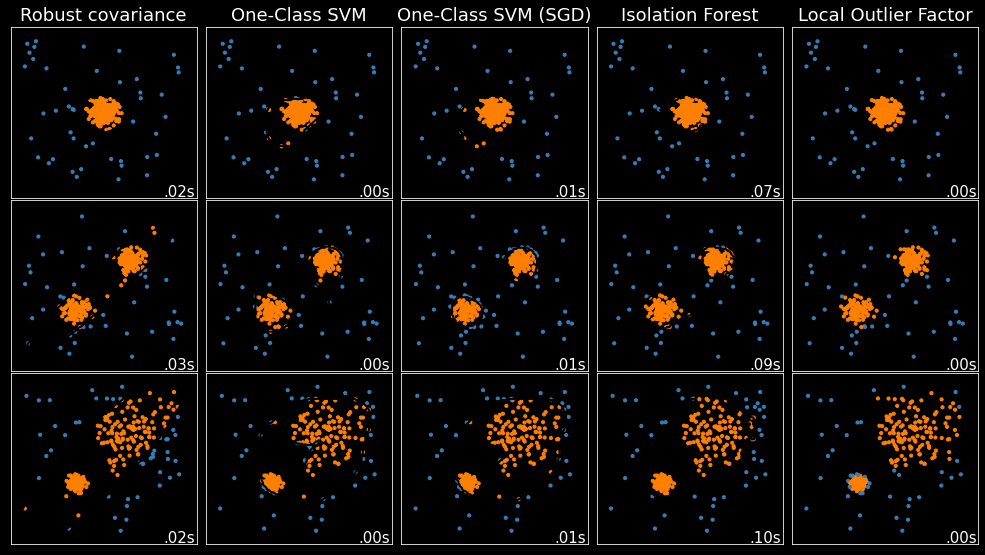

In [96]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared.
# the SGDOneClassSVM must be used in a pipeline with a kernel approximation
# to give similar results to the OneClassSVM
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
    ),
]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
  
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

        colors = np.array(["#377eb8", "#ff7f00"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
